In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression,RidgeCV,Ridge,LassoCV,Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def import_data():
  df = pd.read_table("/content/drive/MyDrive/Statistical Data Mining Project/data/HotelCustomersDataset.tsv").set_index("ID")
  df=df.drop(columns=['NameHash', 'DocIDHash'])
  return df
df=import_data()

This notebook is about the Client Expenses. We want to predict hotel service expenses (food, beverage, etc.) based on the booking behavior.

In [ ]:
def fillna(df):
  return df.fillna(df.mean())
df=fillna(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df

In [ ]:
def get_dummies(df):
  return pd.get_dummies(df)
df=get_dummies(df)

In [ ]:
df

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
ID,,,,,,,,,,,,,,,,,,,,,
1,51.000000,150,45,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0,1,0,0,0,0
2,45.398028,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,1,0,0,0,0,0,0,1
3,31.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,60.000000,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,1,0,0,0,0,0,0,1
5,51.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83586,54.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
83587,47.000000,0,109,327.1,277.5,0,0,1,6,3,...,0,0,1,0,0,0,0,0,1,0
83588,53.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X=np.asarray(df.loc[:, df.columns != 'OtherRevenue'])
y=np.asarray(df['OtherRevenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print("MSE:",mean_squared_error(y_train,reg.predict(X_train)),mean_squared_error(y_test,reg.predict(X_test)))
print("R2:",r2_score(y_train,reg.predict(X_train)),r2_score(y_test,reg.predict(X_test)))

MSE: 8844.440859977853 3001092500882.37
R2: 0.3480341525332825 -270609504.79028606


In [ ]:

model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary(xname=list(df.loc[:, df.columns != 'OtherRevenue'].columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:17:05   Log-Likelihood:            -3.9874e+05
No. Observations:               66872   AIC:                         7.979e+05
Df Residuals:                   66660   BIC:                         7.998e+05
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Age                                             0.3477      0.024     14.368      0.000       0.300       0.395
DaysSinceCreation                               0.0198      0.003      6.297      0.000       0.014       0.026
AverageLeadTime                                 0.0638      0.005     12.953      0.000       0.054       0.073
LodgingRevenue                                  0.1091      0.001     76.561      0.000       0.106       0.112
BookingsCanceled                              -16.0066      6.434     -2.488      0.013     -28.617      -3.396
BookingsNoShowed                              -14.1567     13.937     -1.016      0.310     -41.472      13.159
BookingsCheckedIn                               3.7720      0.921      4.097      0.000       1.968       5.576
PersonsNights                                   8.8292      0.163     54.258      0.000       8.510       9.148
RoomNights                                     -5.7369      0.371    -15.456      0.000      -6.464      -5.009
DaysSinceLastStay                              -0.0835      0.013     -6.526      0.000      -0.109      -0.058
DaysSinceFirstStay                              0.0790      0.014      5.806      0.000       0.052       0.106
SRHighFloor                                    -0.0145      1.751     -0.008      0.993      -3.447       3.418
SRLowFloor                                      0.5936      9.851      0.060      0.952     -18.715      19.902
SRAccessibleRoom                                9.7819     23.739      0.412      0.680     -36.746      56.310
SRMediumFloor                                  16.1316     12.108      1.332      0.183      -7.600      39.863
SRBathtub                                       5.1155      6.889      0.743      0.458      -8.386      18.617
SRShower                                       11.0043      8.631      1.275      0.202      -5.912      27.920
SRCrib                                         15.6819      3.230      4.855      0.000       9.351      22.013
SRKingSizeBed                                   3.5177      0.872      4.035      0.000       1.809       5.226
SRTwinBed                                       3.5395      1.124      3.150      0.002       1.337       5.742
SRNearElevator                                 -7.9848     20.709     -0.386      0.700     -48.574      32.605
SRAwayFromElevator                              9.3574      6.222      1.504      0.133      -2.839      21.553
SRNoAlcoholInMiniBar                           78.6760     34.112      2.306      0.021      11.816     145.536
SRQuietRoom                                    -1.5171      1.336     -1.136      0.256      -4.135       1.101
Nationality_ABW                               -48.0038     

## Ridge Regression

In [ ]:

# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
Z_test = ss.fit_transform(X_test)
# transform the df
#Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)


In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the efficient LOOCV over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
ridge_model.alpha_

376.49358067924675

The optimal alpha from LOOCV is 376.5

In [ ]:
final_ridge = Ridge(alpha=376.5).fit(Z_train, y_train)
print("MSE:",mean_squared_error(y_train,final_ridge.predict(Z_train)),mean_squared_error(y_test,final_ridge.predict(Z_test)))
print("R2:",r2_score(y_train,final_ridge.predict(Z_train)),r2_score(y_test,final_ridge.predict(Z_test)))

MSE: 8846.956610731233 6797.17609438529
R2: 0.3478487045668245 0.38709637802555497


## Lasso Regression

In [ ]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the efficient LOOCV over alphas
lasso_model = LassoCV(alphas=r_alphas)
# fit the model with the best alpha
lasso_model = lasso_model.fit(Z_train, y_train)

In [ ]:
lasso_model.alpha_

1.0

The optimal alpha from LOOCV is 1.0

In [ ]:
final_lasso = Lasso(alpha=1).fit(Z_train, y_train)
print("MSE:",mean_squared_error(y_train,final_lasso.predict(Z_train)),mean_squared_error(y_test,final_lasso.predict(Z_test)))
print("R2:",r2_score(y_train,final_lasso.predict(Z_train)),r2_score(y_test,final_lasso.predict(Z_test)))

MSE: 8912.996015886916 6796.679810039933
R2: 0.3429806255745895 0.3871411281495145


Here are the columns kept by the lasso model.

In [ ]:
df.loc[:, df.columns != 'OtherRevenue'].columns[np.where(final_lasso.coef_!=0)]

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'PersonsNights', 'RoomNights', 'SRCrib', 'Nationality_ARM',
       'Nationality_AUS', 'Nationality_BEL', 'Nationality_CHN',
       'Nationality_FRA', 'Nationality_GIB', 'Nationality_IRL',
       'Nationality_IRQ', 'Nationality_ISR', 'Nationality_JPN',
       'Nationality_PRT', 'MarketSegment_Corporate', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

## Random Forest

In [ ]:
RF = RandomForestRegressor(max_depth=100).fit(X_train, y_train)
print("MSE:",mean_squared_error(y_train,RF.predict(Z_train)),mean_squared_error(y_test,RF.predict(Z_test)))
print("R2:",r2_score(y_train,RF.predict(Z_train)),r2_score(y_test,RF.predict(Z_test)))

MSE: 16698.746113257548 15072.902352670211
R2: -0.23094408495923524 -0.35912860242797295


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10,15,20,30,40,50,60],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'max_depth': 10}

In [ ]:
rf = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
print("MSE:",mean_squared_error(y_train,rf.predict(X_train)),mean_squared_error(y_test,rf.predict(X_test)))
print("R2:",r2_score(y_train,rf.predict(X_train)),r2_score(y_test,rf.predict(X_test)))

MSE: 5147.4689505779525 6259.474422586402
R2: 0.6205555546356412 0.43558111604190264


In [ ]:
rf.feature_importances_[0:15]

array([4.51236341e-02, 3.75802429e-02, 3.61796582e-02, 2.42284949e-01,
       1.25012454e-03, 1.46456938e-04, 2.16061931e-02, 3.60636506e-01,
       5.50184664e-02, 7.33570233e-02, 2.44117180e-02, 1.53616396e-02,
       2.30171405e-04, 0.00000000e+00, 2.29633757e-04])

Text(0.5, 1.0, 'Feature Importance (Top 15)')

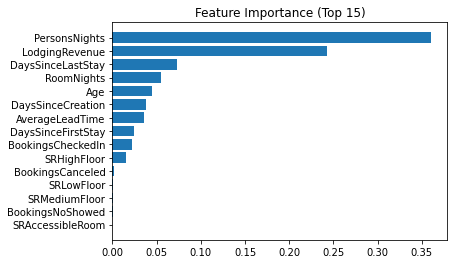

In [ ]:
feature_importance = rf.feature_importances_[0:15]
sorted_idx = np.argsort(feature_importance)

#fig = plt.figure(figsize=(50, 50))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.loc[:, df.columns != 'OtherRevenue'].columns)[sorted_idx])
plt.title('Feature Importance (Top 15)')

In [ ]:
#rea=RandomForestRegressor(max_depth=10,n_estimators=100).fit(X_train,y_train)
print("MSE:",mean_squared_error(y_train,grid_search.predict(X_train)),mean_squared_error(y_test,grid_search.predict(X_test)))
print("R2:",r2_score(y_train,grid_search.predict(X_train)),r2_score(y_test,grid_search.predict(X_test)))

MSE: 5211.739219690527 6206.817408562157
R2: 0.6158178870846596 0.440329216454437


## XG Boost

In [ ]:
param_grid = {"learning_rate" : [1,0.1,0.01],
              "max_depth" : [1,2,3,4,5],
              "alpha":[1,5,10],
              "colsample_bytree":[0.3,0.5,0.6]}
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100)
grid_search = GridSearchCV(estimator = xg_reg, param_grid = param_grid, cv=2,n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_params_


Fitting 2 folds for each of 135 candidates, totalling 270 fits


{'alpha': 1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5}

In [ ]:
print("MSE:",mean_squared_error(y_train,grid_search.predict(X_train)),mean_squared_error(y_test,grid_search.predict(X_test)))
print("R2:",r2_score(y_train,grid_search.predict(X_train)),r2_score(y_test,grid_search.predict(X_test)))

MSE: 6140.762025370919 6232.914861105934
R2: 0.5473351926542915 0.4379760005061847


In [ ]:
final_xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100,alpha=1,colsample_bytree=0.3,learning_rate=0.1,max_depth=5).fit(X_train,y_train)
print("MSE:",mean_squared_error(y_train,final_xg_reg.predict(X_train)),mean_squared_error(y_test,final_xg_reg.predict(X_test)))
print("R2:",r2_score(y_train,final_xg_reg.predict(X_train)),r2_score(y_test,final_xg_reg.predict(X_test)))

MSE: 6140.762025370919 6232.914861105934
R2: 0.5473351926542915 0.4379760005061847


Text(0.5, 1.0, 'Feature Importance (Top 15)')

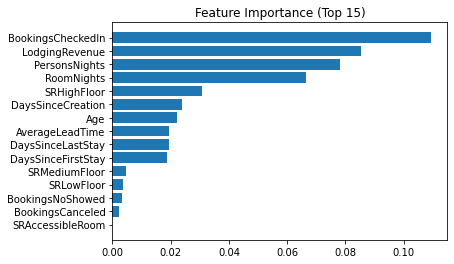

In [ ]:
feature_importance = final_xg_reg.feature_importances_[0:15]
sorted_idx = np.argsort(feature_importance)

#fig = plt.figure(figsize=(50, 50))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.loc[:, df.columns != 'OtherRevenue'].columns)[sorted_idx])
plt.title('Feature Importance (Top 15)')

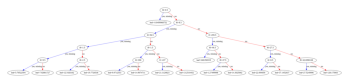

In [ ]:
xgb.plot_tree(final_xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
#plt.show()

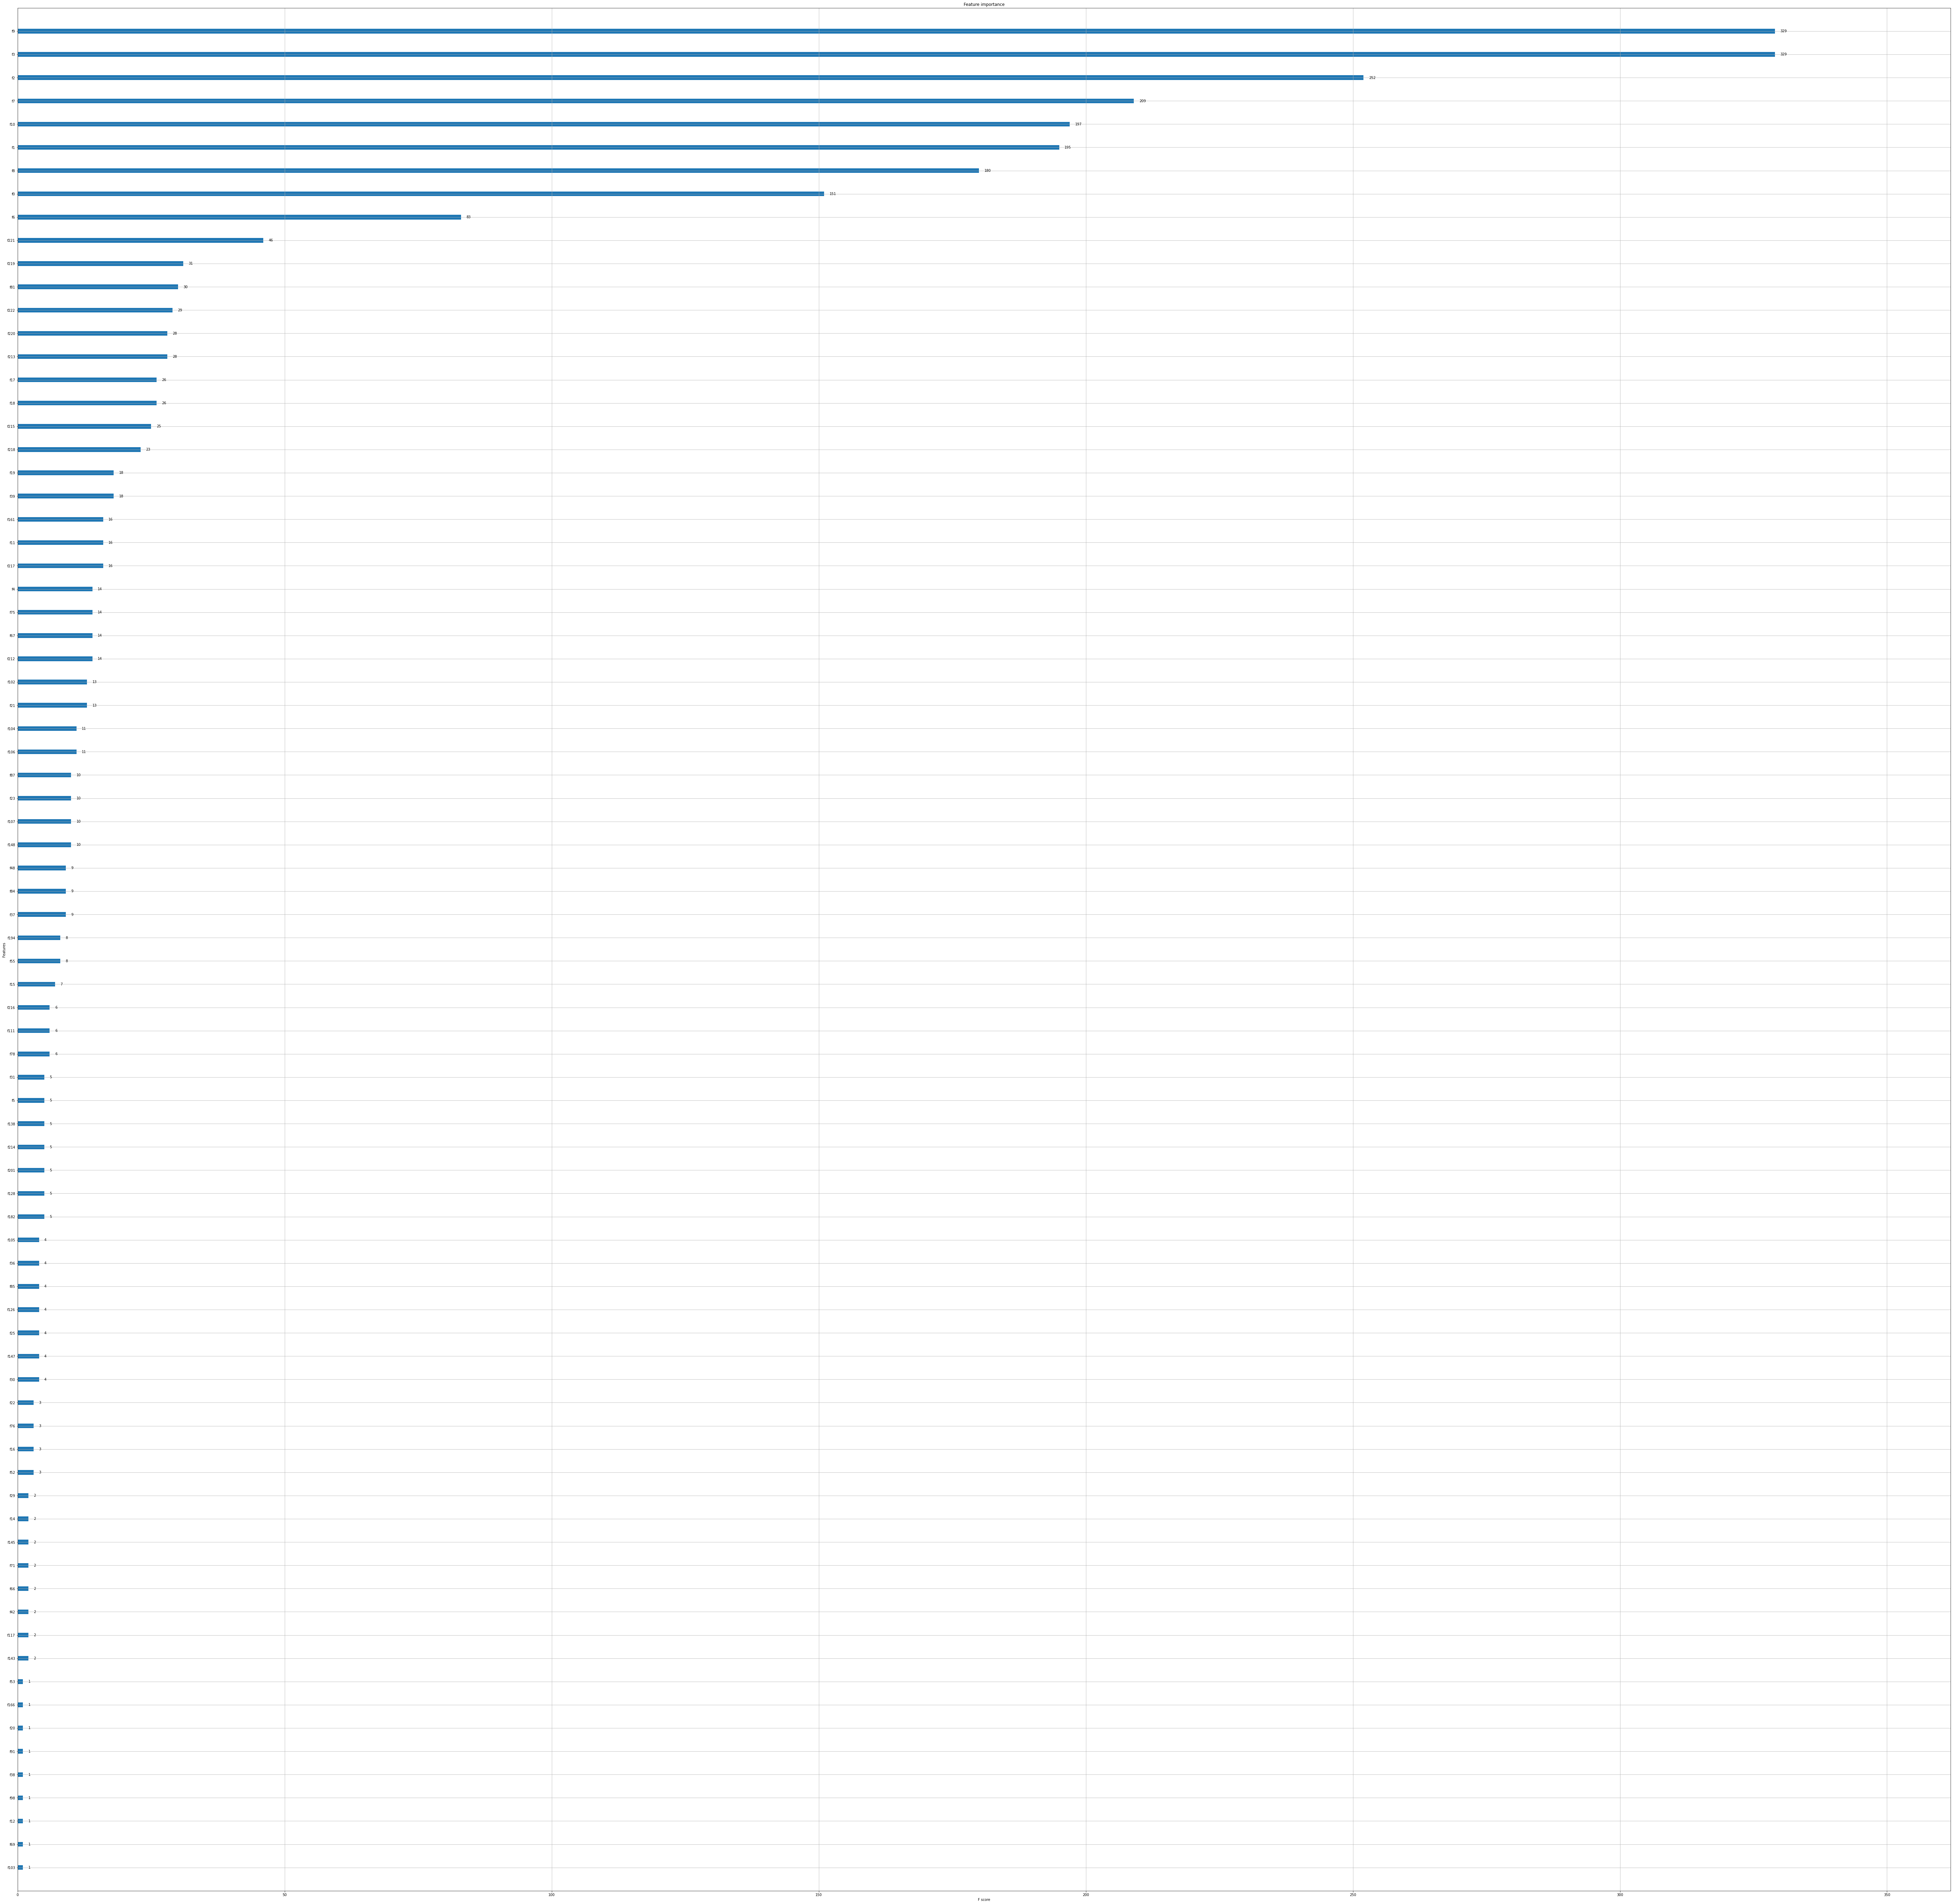

In [ ]:
xgb.plot_importance(final_xg_reg)
#plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

K-fold cross validation with XG Boost

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X,label=y)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[01:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,127.568120,1.046624,127.498027,9.449046
1,122.745917,1.384972,122.733103,9.931147
2,118.502541,1.735354,118.482236,10.648258
3,114.268012,1.696321,114.451062,10.633322
4,110.938744,1.570861,111.238786,11.125692


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    89.201873
Name: test-rmse-mean, dtype: float64


In [ ]:
cv_results

NameError: ignored